# Final Project for SciProgm 2022 Spring

Author: Qingqing Yang  |  Date: 05/05/2022  |  Email: qy775@nyu.edu

Instructor: Shannon Tubridy, PhD  |  TA: Marishka Mehta, MA

## Step 0: Intro and Preparation

Importing modules

In [1]:
# os for path
import os

# numpy for various numeric operations
import numpy.random as npr
import numpy as np
import random

# pands for dataframes
import pandas as pd

# seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# scipy, statsmodels, and pingouin for stats tests
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Data Set of this final project

**OMNI data:** provided by 
In the long term memory omni test, Each person studied 45 pairs of words and gave a rating of how well they thought they learned the pairs.

After a delay, each person engaged in a retrieval test where they were presented with a Lithuanian word and attempted to recall the associated English word. Retrieval trials were scored as correct if the person recalled the English word and incorrect otherwise.

Each person was assigned to one of four groups, and the group assignment determined the approximate study-to-test delay (how long they waited between studying the words and trying to recall). Additionally, some of the participants did the learning task while in an MRI scanner and 
some did not.

- The columns in the dataset are:

    - participant_number: a number assigned to each participant in each group (NOTE: these are not unique across groups. For example there is a participant_number 2 in both the F and A groups)

    - group: the study-test delay group (categorical) (NOTE: a unique ID for a person would be the combination of their participant_number and their group assignment)

    - judgment_of_learning: an individual person's average rating of how well they learned the words (numeric, 0 to 100)

    - response_time: how long it took a person to give their judgment of learning (numeric, in seconds)

    - percent_correct: the proportion of test trials that a person answered correctly. In other words, their memory performance. (numeric, 0 to 1)

    - test_delay_minutes: the delay in minutes from when a person finished the study session to when they started the retrieval session (numeric, in minutes)

    - in_mri: a binary indicator of whether a person was in the MRI scanner (is_mri=1) or not in the scanner (is_mri=0) during the study session (categorical, values of 1 or 0)


### Content and Summary

Overall goal: Performing some exploratory analyses to help understand what affect the participants long-term memory retrieval accuarcy.

- Step 1: Directory Arrangement and Data Import
    - change the current working directory
    - import the csvs into a list
    
    
- Step 2: Data Concatenation
    - diciding how to pull the list of data together into one dataframe
    
    
- Step 3: Data Cleaning
    - drop the participants that have missing data
    
    
- Step 4: Descriptive Stats
    - descriptive stats of percent_correct on different levels of group
    
    
- Step 5: Pearson's Correlation and Scatterplot
    - Step 5 (1): A significant correlation between self report learning outcome (judgment_of_learning) and real performance (percent_correct)
        - judgement_of learning gets higher when percent_correct increases. 
        - Subjects has metacognition about how well they learned, but they tend to overestimate their learning outcome.  
        
    - Step 5 (2): No correlation between response_time and real performance (percent_correct)
        - No time-accuracy trade-off.
    
    
- Step 6: T-Tests
    - Step 6 (1): Equal variance two-sample two-tailed independent t-test
    - Step 6 (2): Unequal variance two-sample indenpendent t-test
        - Conformed that performing the experiment in MRI scanner (in_mri) doesn't affect participants performance (percent_correct).
    
    
- Step 7: Regression
    - Step 7 (1): Significant Single regression model of percent_correct over judgment_of_learning
        - higher judgment_of_learning could predict higher percent_correct
    - Step 7 (2): Significant Single regression model of percent_correct over test_delay_minutes
        - longer test_delay_minutes could predict lower percent_correct
    - Step 7 (3): Significant Multiple Regression model of percent_correct over judgment_of_learning and test_delay_minutes
        - test_delay_minutes and judgment_of_learning are both significant predictors of percent_correct, each of them adding the variances in precent_correct that could be explained by the model, and adding the model fitting



- Step 8: ANOVA
    - Step 8 (1) One-way ANOVA: Significant main effect of group on response_time
        - group affect the response_time, and response_time tend to be longer for a larger group (longer delay)
        - post hoc tests showed that response_time only scored higher in group F than group A
    - Step 8 (2) Two-way ANOVA: 2 (in_mri: 0 or 1) * 4 (group: A, C, F, or H) two-way independent ANOVA on percent_correct
        - group affect the percent_correct.
            - post hoc tests showed that percent_correct scored significantly higher in group A than group F and H,higher in group C than in group H, and higher in F than H. While no difference in the comparision between group A and C, nor C and F.
        - in_mri doesnt affect the percent_correct, and doesnt interact with group


- Step 9: Analysis Summary


=====================================================================================================

## Step 1: Directory Arrangement and Data Import

Folder arrangement on my pc is listed as follows:

**<cwd/home_dir> (your working directory)**
```
  |_ Yang_Qingqing_qy775_final.ipynb
  |_ omni_data
     |_ summary_data # Not having this folder is fine. My code would check and create this folder
     |_ omni_data_group-A.csv
     |_ omni_data_group-C.csv
     |_ omni_data_group-F.csv
     |_ omni_data_group-H.csv
     |_ readme - Copy   
```

You could easily change the home_dir in my code to mimic the arrangement, and my code would auto change the cwd into the home_dir you set.

In [2]:
cwd=os.getcwd()
cwd

'D:\\A-NYU\\Python_JupterNotebook_Workspace\\SciProgramming_SP22\\Assignment\\Final'

You could change ur top dir name as home_dir

The home_dir here is the home dir that u put my final project "Yang_Qingqing_qy775_final.ipynb" code
The Omni data folder be put in the lower folder inside of ur home dir

In [3]:
# Change the following dir into to ur directory, and keep it in home_dir
home_dir = 'D:\\A-NYU\\Python_JupterNotebook_Workspace\\SciProgramming_SP22\\Assignment\\Final' 

# change ur dir to your target top dir
if os.getcwd() != home_dir:
    os.chdir(home_dir)
    
print(os.getcwd())

# check list of files in target top dir
dir_list=os.listdir('.')
dir_list

D:\A-NYU\Python_JupterNotebook_Workspace\SciProgramming_SP22\Assignment\Final


['.ipynb_checkpoints',
 '3dscatter.jpg',
 'final_project.pdf',
 'omni_data',
 'Yang_Qingqing_qy775_final.ipynb']

In [4]:
# Check if the data file exist
datadir_to_check = './omni_data/'
checkdata=os.path.isdir(datadir_to_check)
if checkdata:
    print("data folder exist in home_dir, now loading")
else:
    print('data folder exist in home_dir, please rearrange the folder')

data folder exist in home_dir, now loading


Making indivisual data frame for omni_data

In [5]:
dir_list=os.listdir(datadir_to_check)
dir_list

['omni_data_group-A.csv',
 'omni_data_group-C.csv',
 'omni_data_group-F.csv',
 'omni_data_group-H.csv',
 'readme - Copy.txt']

In [6]:
# get rid of readme.txt
all_group=[]
for i in dir_list:
    if ".csv"in i:
        all_group.append(i)
all_group

['omni_data_group-A.csv',
 'omni_data_group-C.csv',
 'omni_data_group-F.csv',
 'omni_data_group-H.csv']

In [7]:
# read the csv into list
df_list = []
num_group=[]

# fill in code here:
for igroupdf in all_group:
    igroupdf=pd.read_csv(datadir_to_check+igroupdf)
    num_group.append(len(igroupdf.index))
    df_list.append(igroupdf)
print(num_group)
df_list

[20, 48, 50, 49]


[    participant_number group  judgment_of_learning  response_time  \
 0                    1     A                  82.0           2.45   
 1                    2     A                  65.0           3.45   
 2                    3     A                  56.0           2.87   
 3                    4     A                  41.0           4.38   
 4                    5     A                  63.0           2.15   
 5                    6     A                  76.0           2.33   
 6                    7     A                  46.0           4.03   
 7                    8     A                  40.0           3.67   
 8                    9     A                  51.0           3.27   
 9                   10     A                  66.0           5.52   
 10                  11     A                  81.0           3.63   
 11                  12     A                  97.0           3.50   
 12                  13     A                  42.0           2.51   
 13                 

In [8]:
# Let's randomly check a sub_df to see if it has the correct size
print(num_group)
print(len(df_list[0].index))
df_list[0]

[20, 48, 50, 49]
20


,participant_number,group,judgment_of_learning,response_time,percent_correct,test_delay_minutes,in_mri
0,1,A,82.0,2.45,0.62,9.99,0
1,2,A,65.0,3.45,0.27,8.24,0
2,3,A,56.0,2.87,0.38,7.57,0
3,4,A,41.0,4.38,0.72,6.65,1
4,5,A,63.0,2.15,0.76,5.51,0
5,6,A,76.0,2.33,0.69,5.43,0
6,7,A,46.0,4.03,0.60,7.34,0
7,8,A,40.0,3.67,0.42,7.35,1
8,9,A,51.0,3.27,0.42,6.64,0
9,10,A,66.0,5.52,0.56,8.20,0


=====================================================================================================

## Step 2: Data Concatenation
Since **group is a between group independent variable**, and the columns in different csv are the same, I'll simply **concatenate** the data, by putting each groups data in diff rows

In [9]:
all_participants = pd.concat(df_list, ignore_index=True)
all_participants

,participant_number,group,judgment_of_learning,response_time,percent_correct,test_delay_minutes,in_mri
0,1,A,82.0,2.45,0.62,9.99,0
1,2,A,65.0,3.45,0.27,8.24,0
2,3,A,56.0,2.87,0.38,7.57,0
3,4,A,41.0,4.38,0.72,6.65,1
4,5,A,63.0,2.15,0.76,5.51,0
...,...,...,...,...,...,...,...
162,46,H,51.0,5.00,0.04,10022.76,1
163,47,H,50.0,4.10,0.09,10034.43,0
164,48,H,43.0,3.06,0.16,10023.23,0
165,49,H,90.0,2.84,0.89,10056.45,0


In [10]:
# Check if the total number of participant is correct after concatenation

if len(all_participants.index)==sum(num_group):
    print("Correctly concatenated the different groups of data, let's move on")
else:
    print("The total number of participant is not correct, something went wrong in concatenation")

Correctly concatenated the different groups of data, let's move on


=====================================================================================================

## Step 3: Data Cleanning

In [11]:
columns=all_participants.columns
columns

Index(['participant_number', 'group', 'judgment_of_learning', 'response_time',
       'percent_correct', 'test_delay_minutes', 'in_mri'],
      dtype='object')

In [12]:
print("Now we drop the Nan in each column in the order that from left to right \n")
icol=[]
drop_rows =[]
clean_df=[]
drops=0

for icol in columns:
    len_ori=len(all_participants.index) # the number of rows before each cleanning
    
    clean_df=all_participants.dropna(subset=[icol]) # the cleaned df
    
    drop_rows=len_ori-len(clean_df.index) # the number of rows cleaned in this iterate
    
    drops+=drop_rows
    
    print(f'In column "{icol}",')
    print(f'we droped {drop_rows} rows')
    print(f'Before the dropping, there are {len_ori} rows')
    print(f'Afterwards, there are {len(clean_df.index)} rows\n')

    
if len(clean_df.index)==len(all_participants.index):
    print("In summary, we had no missing data")
else:
    print(f"In summary,we droped {drops} rows")


Now we drop the Nan in each column in the order that from left to right 

In column "participant_number",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In column "group",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In column "judgment_of_learning",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In column "response_time",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In column "percent_correct",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In column "test_delay_minutes",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In column "in_mri",
we droped 0 rows
Before the dropping, there are 167 rows
Afterwards, there are 167 rows

In summary, we had no missing data


I dropped the missing data column by column from left to right, and count cumulatively how many rows I dropped each time. 

However, in each column, I dropped 0 rows cumculatively.

Before each dropping for each column, the whole number of rows are 167, which remained the same (167) after each time I cleaned the data.

**In total, I dropped 0 rows, so I had no missing data in omni_data**

=====================================================================================================

## Step 4: Descriptive Stats

Now let's look at the pattern of **percent_correct** on different levels of **group**


percent_correct: the proportion of test trials that a person answered correctly. In other words, their memory performance. (numeric, 0 to 1)

group: the study-test delay group (categorical, A, C, F, H). Between participant independent variable.

In [13]:
percorr_bygroup=clean_df.groupby('group')['percent_correct']
percorr_bygroup.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,20.0,0.566500,0.187316,0.27,0.415,0.54,0.6975,0.90
C,48.0,0.472292,0.272383,0.04,0.245,0.44,0.6750,1.00
F,50.0,0.372200,0.230786,0.00,0.165,0.37,0.5550,0.90
H,49.0,0.209388,0.182339,0.00,0.080,0.20,0.3000,0.89


Save this descriptive results of percent_correct grouped by group dataframe to a csv file

In [14]:
# Save the result in df_percorr, which is a dataframe
df_percorr=percorr_bygroup.describe()

# now check the folder summary_data under omni_data dir
print(cwd)
print(datadir_to_check)
os.listdir(datadir_to_check)

D:\A-NYU\Python_JupterNotebook_Workspace\SciProgramming_SP22\Assignment\Final
./omni_data/


['omni_data_group-A.csv',
 'omni_data_group-C.csv',
 'omni_data_group-F.csv',
 'omni_data_group-H.csv',
 'readme - Copy.txt']

In [15]:
newfolder='summary_data/'
summary_dir=datadir_to_check+newfolder

if not os.path.isdir(summary_dir):
    os.makedirs(summary_dir)
else:
    print('There exist a summary_data folder under omni_data dir\n')

print(f'The summary data will be put in {summary_dir}')

os.path.isdir(summary_dir)


The summary data will be put in ./omni_data/summary_data/


True

In [16]:
descri_file_dir=os.path.join(summary_dir,'percorr_bygroup_summary.csv')
df_percorr.to_csv(descri_file_dir)

print(os.path.isfile(descri_file_dir))
os.listdir(summary_dir)

True


['percorr_bygroup_summary.csv']

=====================================================================================================

## Step 5: Pearson's Correlation and Scatterplot

### Step 5 (1): Correlation between self report learning outcome and real performance

Now let's look at if subject's self-report learning outcome (**judgment_of_learning**) correlates with the real memory accuraccy (**percent_correct**).

I would hypothezed that the **percent_correct** and **judgment_of_learning** has a possitive correlation,since participants' should have a metacognition about how well they learnt in the experiment, which should be reflected by real accuarcy. 

Therefore, their self-report learning outcome (**judgment_of_learning**) should be higher if they really did better with higher accuarcy (**percent_correct**).

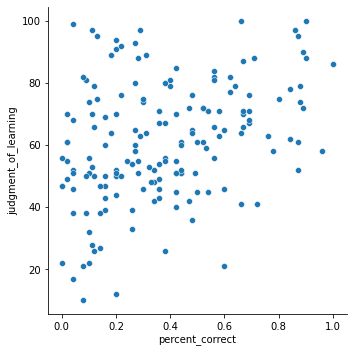

In [17]:
# the scatterplot of percent_correct and judgment_of_learning

sns.relplot(x='percent_correct', 
            y='judgment_of_learning', 
            data=clean_df)

From the scatter plot, we can see that there might exist a correlation between percent_correct and judgment_of_learning, however they seem not higher linearly related.

In [18]:
corr_results = stats.pearsonr(clean_df['percent_correct'], clean_df['judgment_of_learning'])
corr_results

n = len(clean_df.index)
df_r=n-2 # number of pairs -2
alpha = .05

r = corr_results[0]
p = corr_results[1]

if p < alpha:
    if corr_results[1]<0.001:
        print(f'There is a significant correlation, r({df_r}) = {(np.round(r,2))}, p < .001')
    elif corr_results[1]<0.01:
        print(f'There is a significant correlation, r({df_r}) = {(np.round(r,2))}, p < .01')
    else:
        print(f'There is a significant correlation, r({df_r}) = {(np.round(r,2))}, p = {(np.round(p,2))}')
else:
    print(f'There is no significant correlation, r({df_r}) = {np.round(r,2)}, p = {np.round(p,2)}')

There is a significant correlation, r(165) = 0.35, p < .001


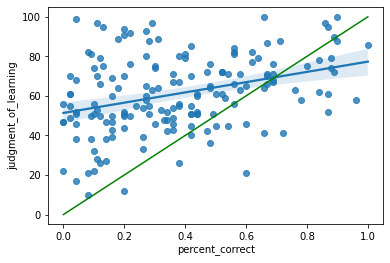

In [19]:
# draw a best fitting line
sns.regplot(x='percent_correct', 
            y='judgment_of_learning', 
            data=clean_df)

# draw a diagonal
# plot([x1, x2], [y1, y2])
plt.plot([0, 1], [0, 100],color="green") 

plt.show()

#### Result reports of step 5 (1)

We applied Pearson's correlation to percent_correct and judgment_of_learning. 

As expected, the result indicates that there is a quite **significant possitive correlation** between percent_correct and judgment_of_learning, _r_(165) = 0.35, _p_ < .001.

Therefore, the result suggests that participants do have a metacognition about how well they learnt for this test, and their self estimation of learning outcome gets higher if they really did better in the test.

Additionally, by plotting a diagonal line, we can tell that most of the dots are above the diagonal line, which means that _**people tend to overestimate how well they learnt in the test**_, compared to their real performance

--------------------------------------------------------------------------

### Step 5 (2): Correlation between response time and accuarcy (trade-off)

Now let's look at if subject's real memory accuraccy (**percent_correct**) correlates with the response time (**response_time**).

I would hypothezed that the percent_correct and response_time has no significant correlation,which is the situation we desired cause it means there's no trade-off between the response accuarcy and time, in which case we could treat percent_correct as a dependent variable for accuarcy without considerate the response time.

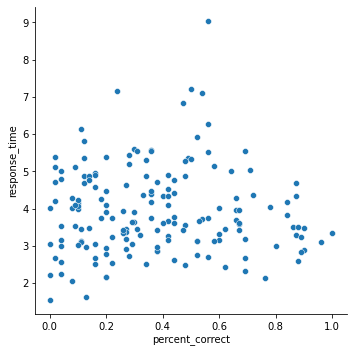

In [20]:
sns.relplot(x='percent_correct', 
            y='response_time', 
            data=clean_df)

In [21]:
corr_results2 = stats.pearsonr(clean_df['percent_correct'], clean_df['response_time'])

n = len(clean_df.index)
df_r=n-2 # number of pairs -2
alpha = .05

r = corr_results2[0]
p = corr_results2[1]

if p < alpha:
    if corr_results2[1]<0.001:
        print(f'There is a significant correlation, r({df_r}) = {(np.round(r,2))}, p < .001')
    elif corr_results2[1]<0.01:
        print(f'There is a significant correlation, r({df_r}) = {(np.round(r,2))}, p < .01')
    else:
        print(f'There is a significant correlation, r({df_r}) = {(np.round(r,2))}, p = {(np.round(p,2))}')
else:
    print(f'There is no significant correlation, r({df_r}) = {np.round(r,2)}, p = {np.round(p,2)}')

There is no significant correlation, r(165) = -0.01, p = 0.94


#### Result reports of step 5 (2)

We applied Pearson's correlation to percent_correct and response_time. 

As expected, the result indicates that **there is no significant possitive correlation between percent_correct and response_time, _r_(165) = -0.01, _p_ = .94 > .05.**

Therefore, the result suggests that there isn't a response accuarcy and time trade-off, we could just focus on analyzing the response accuarcy in the following analysis.

=====================================================================================================

## Step 6: T-Tests

Now, let's see if performing the experiment in MRI scanner (**in_mri**) affect participants performance (**percent_correct**).

My hypothisis is that in_mri shouldn't affect the accuarcy, cause we want the scanner recording behaviors that also happen without scanner. BTW, in_mri is a between-subject variable, with each subject assigned to only one level of in_mri, either in the scanner or not.Therefore, I'm going to apply a **two sampe indepedent t-test**.

The details about it is listed as follow:
 
_in_mri: a binary indicator of whether a person was in the MRI scanner (in_mri=1) or not in the scanner (in_mri=0) during the study session (categorical, values of 1 or 0)_

In [22]:
percorr_bymri=clean_df.groupby('in_mri')['percent_correct']
percorr_bymri.describe()

,count,mean,std,min,25%,50%,75%,max
in_mri,,,,,,,,
0,83.0,0.401566,0.262128,0.0,0.20,0.36,0.600,1.0
1,84.0,0.351667,0.249166,0.0,0.14,0.30,0.505,0.9


In [23]:
# Check the number of subjects in each level of is_mri

percorr_bymri_des=percorr_bymri.describe()
n1_bymri=percorr_bymri_des['count'][0]
n2_bymri=percorr_bymri_des['count'][1]
if n1_bymri == n2_bymri:
    print(f'The number of participants in each level of in_mri is the same, with {n1_bymri} participants each')
else:
    print(f'The number of participants in each level of in_mri is different,\nwith {n1_bymri} participants out of scanner and {n2_bymri} in scanner')

The number of participants in each level of in_mri is different,
with 83.0 participants out of scanner and 84.0 in scanner


Since the number of participants in different levels of in_mri doesnt differ too much, we could ignore this and treat the data as equal size two-sample indepent t-test.

#### Barplot the data

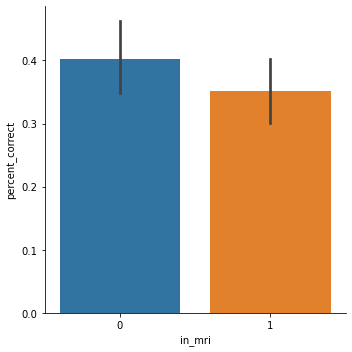

In [24]:
# Barplot
sns.catplot(x='in_mri', 
            y='percent_correct', 
            data=clean_df,
           kind='bar')

In [25]:
# pull data for each in_mri levels to dataframe
inmri_data = clean_df[clean_df['in_mri']==1]
outmri_data = clean_df[clean_df['in_mri']==0]
outmri_data.head()

,participant_number,group,judgment_of_learning,response_time,percent_correct,test_delay_minutes,in_mri
0,1,A,82.0,2.45,0.62,9.99,0
1,2,A,65.0,3.45,0.27,8.24,0
2,3,A,56.0,2.87,0.38,7.57,0
4,5,A,63.0,2.15,0.76,5.51,0
5,6,A,76.0,2.33,0.69,5.43,0


### Step 6 (1):  Equal variance two-sample two-tailed independent t-test

In [26]:
# two-sample two-tailed independent t-test
t_results=stats.ttest_ind(inmri_data['percent_correct'], outmri_data['percent_correct'])
t_results

Ttest_indResult(statistic=-1.2609673493866687, pvalue=0.2091006528685297)

In [27]:
t_val=t_results[0]
p=t_results[1]
df_t=n1_bymri+n2_bymri-2 # n1+n2-2

alpha = 0.05

if p < alpha:
    if t_results[1]<0.001:
        print('Memory performance is significantly different whether in MRI scanner or not,')
        print(f't({df_t}) = {(np.round(t_val,2))}, p < .001')
    elif t_results[1]<0.01:
        print('Memory performance is significantly different whether in MRI scanner or not,')
        print(f't({df_t}) = {(np.round(t_val,2))}, p < .01')
    else:
        print('Memory performance is significantly different whether in MRI scanner or not,')
        print(f't({df_t}) = {(np.round(t_val,2))}, p = {(np.round(p,2))}')
else:
    print('Memory performance is not significantly different whether in MRI scanner or not,')
    print(f't({df_t}) = {np.round(t_val,2)}, p = {np.round(p,2)}')

Memory performance is not significantly different whether in MRI scanner or not,
t(165.0) = -1.26, p = 0.21


### Step 6 (2): Unequal variance two-sample indenpendent t-test
When ``n1 != n2``, the equal variance t-statistic is no longer equal to the
    unequal variance t-statistic. 
    
Even though I feel n1 and n2 are quite similar, let's still take a quick look at the **unequal variance** two-sample two-tailed independent t-test

In [28]:
# Unequal variance two-sample two-tailed independent t-test
t_results_unequal=stats.ttest_ind(inmri_data['percent_correct'], outmri_data['percent_correct'], equal_var=False)
t_results_unequal

Ttest_indResult(statistic=-1.2605825166227573, pvalue=0.20924598085272444)

In [29]:
t_val_uneq=t_results_unequal[0]
p_uneq=t_results_unequal[1]
df_t=np.round(n1_bymri+n2_bymri-2)

alpha = 0.05

if p_uneq < alpha:
    if t_results_unequal[1]<0.001:
        print('Memory performance is significantly different whether in MRI scanner or not,')
        print(f't({df_t}) = {(np.round(t_val_uneq,2))}, p < .001')
    elif t_results_unequal[1]<0.01:
        print('Memory performance is significantly different whether in MRI scanner or not,')
        print(f't({df_t}) = {(np.round(t_val_uneq,2))}, p < .01')
    else:
        print('Memory performance is significantly different whether in MRI scanner or not,')
        print(f't({df_t}) = {(np.round(t_val_uneq,2))}, p = {(np.round(p_uneq,2))}')
else:
    print('Memory performance is not significantly different whether in MRI scanner or not,')
    print(f't({df_t}) = {np.round(t_val_uneq,2)}, p = {np.round(p_uneq,2)}')

Memory performance is not significantly different whether in MRI scanner or not,
t(165.0) = -1.26, p = 0.21


#### Result report of Step 6
In summary, whether or not in the MRI scanner, the real memory retrieval memory performance (**percent_correct**) is not significantly different, _t_(165.0) = -1.26, _p_ = .21 > .05.

As expected, being inside of MRI scanner doesn't influence how well people do in the long-term language related memory test.We could confidently say that the experiment inside of MRI scanner could be treat parallel to performance outside of scanner, and the brain imaging inside of scanner does capture the same brain activities when they're not in the scanner.

=====================================================================================================

## Setp 7: Regression

### Step 7 (1): Single regression of percent_correct over judgment_of_learning
In the Correlation part, we already known that there's significant possitive correlation between percent_correct and judgment_of_learning, r(165) = 0.35, p < .001. So I'll assume that maybe judgment_of_learning could predict the percent_correct, where higher judgment_of_learning leads to higher percent_correct, since participants should have a nice metacognition about how well they learned and if u learn better u should do better in the test.

To test it, let's compute a regression on percent_correct over judgment_of_learning to see if participants self-report accuarcy (**judgment_of_learning**) could predict the real memory performance (**percent_correct**) well.

In [30]:
lr_model = smf.ols(formula = 'percent_correct ~ judgment_of_learning', data=clean_df)
lr_fit = lr_model.fit()
lr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent_correct   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     22.31
Date:                Fri, 06 May 2022   Prob (F-statistic):           4.93e-06
Time:                        01:44:05   Log-Likelihood:                 1.5864
No. Observations:                 167   AIC:                            0.8272
Df Residuals:                     165   BIC:                             7.063
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0957      0.062      1.537      0.126      -0.027       0.219
judgment_of_learning     0.0046      0.001      4.724      0.000       0.003       0.007
==============================================================================
Omnibus:                        7.515   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.830
Skew:                           0.258   Prob(JB):                       0.0894
Kurtosis:                       2.346   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

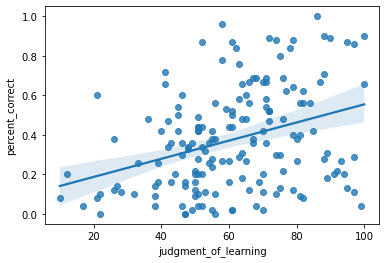

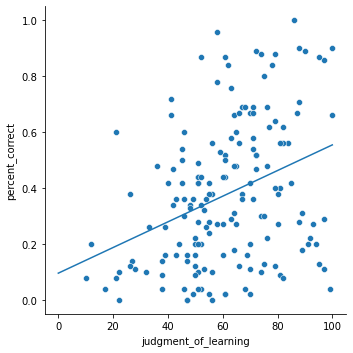

In [31]:
# Scatterplot and best-fitting line
sns.regplot(x=clean_df['judgment_of_learning'], y=clean_df['percent_correct'])
sns.relplot(x=clean_df['judgment_of_learning'], y=clean_df['percent_correct'])

X = np.linspace(0,100,200)
y_pred = (lr_fit.params['judgment_of_learning']*X) + lr_fit.params['Intercept']

plt.plot(X, y_pred)
plt.show()

In [32]:
# make a prediction from a random predictor' value

intercept = lr_fit.params['Intercept']
b = lr_fit.params['judgment_of_learning']

JOL = random.randint(min(clean_df['judgment_of_learning']),max(clean_df['judgment_of_learning']))

y_pred =  b*JOL + intercept

print(f'For a random judgment_of_learning = {JOL}, \npredicted percent_correct is {y_pred}')


For a random judgment_of_learning = 96, 
predicted percent_correct is 0.5364123107893237


#### Result report for Step 7 (1)

  As expected, participants self-report accuarcy (**judgment_of_learning**) could significantly correcttly predict the real memory performance (**percent_correct**) well, with the fomula as: 

**percent_correct = 0.0046 * judgment_of_learning + 0.0957**, where the slop = 0.0046, _t_ = 4.724, _p_ < .001, the coeffiecient of judgment_of_learning is significantly different than zero, so judgment_of_learning is a significant predictor for percent_correct.Besides, higher judgment_of_learning leads to higher percent_correct.

  Additionally, for this regression model, $R^2$ = .119, _F_(1, 165) = 22.31, _p_ < .001.The $R^2$ = .119 means the proportion of variance in percent_correct that could be explained by judgment_of_learning, which is not high enough for me as a predicting model.

--------------------------------------------------------------------------

### Step 7 (2): Single regression of percent_correct over test_delay_minutes

Now let's move on to form a regression on percent_correct over judgment_of_learning to see if the delay time before recall (**test_delay_minutes**) could predict the real memory performance (**percent_correct**) well.

My assumption would be that longer test_delay_minutes would lead to lower percent_correct, since the memory tends to be losted or would declay as delay increases 

In [33]:
lr_model2 = smf.ols(formula = 'percent_correct ~ test_delay_minutes', data=clean_df)
lr_fit2 = lr_model2.fit()
lr_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent_correct   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     48.57
Date:                Fri, 06 May 2022   Prob (F-statistic):           7.27e-11
Time:                        01:44:06   Log-Likelihood:                 12.538
No. Observations:                 167   AIC:                            -21.08
Df Residuals:                     165   BIC:                            -14.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5250      0.028     19.048      0.000       0.471       0.579
test_delay_minutes -3.197e-05   4.59e-06     -6.969      0.000    -4.1e-05   -2.29e-05
==============================================================================
Omnibus:                        4.718   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.793
Skew:                           0.391   Prob(JB):                       0.0910
Kurtosis:                       2.721   Cond. No.                     9.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='test_delay_minutes', ylabel='percent_correct'>

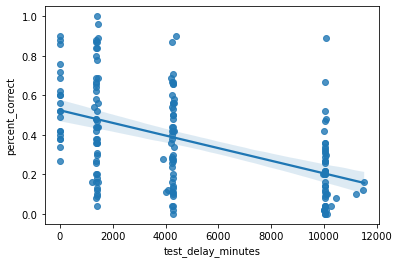

In [34]:
# Scatterplot and best-fitting line
sns.regplot(x=clean_df['test_delay_minutes'], y=clean_df['percent_correct'])

In [35]:
# make a prediction from a random predictor' value

intercept = lr_fit2.params['Intercept']
b = lr_fit2.params['test_delay_minutes']

test_delay = random.uniform(min(clean_df['test_delay_minutes']),max(clean_df['test_delay_minutes']))
test_delay = np.round(test_delay,2)

y_pred =  b*test_delay + intercept

print(f'For a random test_delay_minutes = {test_delay}, \npredicted percent_correct is {y_pred}')

For a random test_delay_minutes = 5774.14, 
predicted percent_correct is 0.3404090004988358


#### Result report for Step 7 (2)

  As expected, participants self-report accuarcy (**test_delay_minutes**) could significantly correcttly predict the real memory performance (**percent_correct**) well, with the fomula as: 

**percent_correct = -3.197e-05 * test_delay_minutes + 0.5250**, where the slop = -3.197e-05, _t_ = -6.969, _p_ < .001, the coeffiecient of test_delay_minutes is significantly different than zero, so test_delay_minutes is also a significant predictor of percent_correct. Higher test_delay_minutes significantly leads to lower percent_correct.

  Additionally, for this regression model, $R^2$ = .227, _F_(1, 165) = 48.57, _p_ < .001.The $R^2$ = 0.227, which is higher than that of judgment_of_learning regression model $R^2$ = .119, indicating that 22.7% of variance in percent_correct that could be explained by test_delay_minutes, which is acceptable for me as a predicting model.

-----------------------------------------------------------------------------------------

### Step 7 (3): Multiple Regression of percent_correct over judgment_of_learning and test_delay_minutes
Now I'll see if the delay before memory retrieval (**test_delay_minutes**), and participants self-rating learning outcome (**judgment_of_learning**) could predict the memory recall accuarcy (**percent_correct**), and how well they could predict the recall accurcy.

In [36]:
mlr_model = smf.ols(formula='percent_correct ~ test_delay_minutes + judgment_of_learning', data=clean_df)
mlr_fit = mlr_model.fit()
mlr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent_correct   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     35.69
Date:                Fri, 06 May 2022   Prob (F-statistic):           1.35e-13
Time:                        01:44:06   Log-Likelihood:                 21.170
No. Observations:                 167   AIC:                            -36.34
Df Residuals:                     164   BIC:                            -26.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2850      0.063      4.556      0.000       0.161       0.409
test_delay_minutes   -2.911e-05   4.42e-06     -6.584      0.000   -3.78e-05   -2.04e-05
judgment_of_learning     0.0037      0.001      4.226      0.000       0.002       0.005
==============================================================================
Omnibus:                        0.218   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.301
Skew:                           0.083   Prob(JB):                        0.860
Kurtosis:                       2.874   Cond. No.                     2.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# make a prediction from a random combination of predictors' values

intercept = mlr_fit.params['Intercept']
b1 = mlr_fit.params['test_delay_minutes']
b2 = mlr_fit.params['judgment_of_learning']

test_delay = random.uniform(min(clean_df['test_delay_minutes']),max(clean_df['test_delay_minutes']))
test_delay = np.round(test_delay,2)
JOL = random.randint(min(clean_df['judgment_of_learning']),max(clean_df['judgment_of_learning']))

y_pred = b1*test_delay+ b2*JOL + intercept

print(f'For a random combination test_delay_minutes = {test_delay}, judgment_of_learning = {JOL}, \npredicted percent_correct is {y_pred}')


For a random combination test_delay_minutes = 3043.45, judgment_of_learning = 26, 
predicted percent_correct is 0.2928014959728175


#### Result report for Step 7 (3)

    A multiple linear regression was calculated to predict the percent_correct, based on test_delay_minutes and judgment_of_learning.

**A significant regression model was found**, where $R^2$ = .303, _F_(2, 164) = 35.69, _p_ < .001.

    The equation of this multiple regression model is: 

percent_correct = -2.911e-05 * test_delay_minutes + 0.0037 * judgment_of_learning + 0.2850. 

**Both predictors (IVs) are significant predictor of percent_correct**:

where for IV test_delay_minutes, the slop = -2.911e-05, _t_ = -6.584, _p_ < .001, the coeffiecient of test_delay_minutes is significantly different than zero. Higher test_delay_minutes significantly leads to lower percent_correct.

For IV judgment_of_learning, the slop = 0.0037, _t_ = 4.226, _p_ < .001, the coeffiecient of judgment_of_learning is also significantly different than zero. Higher judgment_of_learning significantly leads to higher percent_correct.

**For model comparison**:

For this multiple regression model, $R^2$ = .303, Log-Likelihood = 21.170， AIC = -36.34，BIC = -26.99;

While for the single regression model based on test_delay_minutes, the $R^2$ = .227, Log-Likelihood = 12.538, AIC = -21.08, BIC = -14.84;

for the single regression model based on judgment_of_learning, the $R^2$ = .119, Log-Likelihood = 1.5864, AIC = 0.8272, BIC = 7.063.

The $R^2$ indicating that 30.3% of variance in percent_correct could be explained by the multiple regression model based on test_delay_minutes and judgment_of_learning, which is higher than that of any single regression model. Therefore, in terms of explaning the variance of predicted variable percent_correct, the multiple regression model is the best model, explaining more variance of percent_correct. 

Based on the truth that $R^2$ of multiple regression model is higher than that of two single regression model respectively, along with the result showing that each predictor is significant predictor, adding any predictor in the model benefits in explaining more proportion of variance in predicted variable.

    The lower the value for AIC and BIC, higher log-likelihood, the better the fit of the model. 

Therefore, based on the value of **Log-Likelihood, AIC, and BIC**, the multiple regression model has the highest LL, lowest AIC and BIC, which means that multiple regression model is the model that fit best with the data, among the 3 regression models. Therefore, adding any predictor in the model benefits in fitting the data better.

**Conclusion**

In summary, as I expected, delay time (**test_delay_minutes**) predicts the memory preformance (**percent_correct**) where longer delay leads to losing or declay of memory, and participants metacognition about their learning outcome (**judgment_of_learning**) could predict the real memory performance (**percent_correct**) well where higher self-rating learning outcome predicts better real performance. 

More importantly, each of delay and self-rating learning outcome is a significant predictor, and the multiple regression model that combining the two outperformed two single regression model in $R^2$ (proportion of variances in predicted variable explained by predictors) and in fitting the data. 

============================================================================================================

## Step 8: ANOVA

In [38]:
# check the data columns again
clean_df.head()

,participant_number,group,judgment_of_learning,response_time,percent_correct,test_delay_minutes,in_mri
0,1,A,82.0,2.45,0.62,9.99,0
1,2,A,65.0,3.45,0.27,8.24,0
2,3,A,56.0,2.87,0.38,7.57,0
3,4,A,41.0,4.38,0.72,6.65,1
4,5,A,63.0,2.15,0.76,5.51,0


### Step 8 (1) One-way ANOVA

Before digging into whether group influence the percent_correct, I also want to have a final check on if **group** influence the **response_time**. Even though I tested that there's no correlation between precent_correct and response_time, it's still better to check if group left an influence on response_time.

The **group** is a **categorical between-participant** variable that has 4 levels: A, C, F, and H, where the delay in group A < C < F < H.

    group A: lower than 10 mins

    group C: around 1400 mins

    group F: around 4250 mins

    group H: around 10000 mins

My hypothesis about this test result would be that it'd be the best situation if there's no significant main effect cause in that case we could only analyze the precent_correct without looking into the response time. However, it's still possible that with delay time gets longer (group gets bigger), the response_time might be longer due to the memory lost or declay.

In [39]:
restime_bygroup=clean_df.groupby(['group'])['response_time']
restime_bygroup.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,20.0,3.421500,0.890531,2.15,2.8700,3.360,3.640,5.52
C,48.0,3.791250,1.054546,1.64,3.1225,3.735,4.435,6.83
F,50.0,4.332600,1.347988,2.21,3.3325,4.270,4.905,9.04
H,49.0,3.921633,1.079617,1.54,3.0600,3.920,4.780,6.13


In [40]:
oneway_model = smf.ols(formula = 'response_time ~ C(group)', data=clean_df)
oneway_model = oneway_model.fit()
anova_table = sm.stats.anova_lm(oneway_model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(group),3.0,14.153276,4.717759,3.621883,0.01442
Residual,163.0,212.319011,1.302571,NaN,NaN


In [41]:
eta2=anova_table['sum_sq'][0]/anova_table['sum_sq'][1]
eta2

0.0666604273676969

In [42]:
# For significant one-way ANOVA, perform a post hoc Tukey's HSD test
tukey_comparisons = pairwise_tukeyhsd(endog = clean_df['response_time'],
                          groups = clean_df['group'],
                          alpha = .05)

tukey_comparisons.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,C,0.3698,0.6031,-0.4188,1.1583,False
A,F,0.9111,0.0155,0.1272,1.695,True
A,H,0.5001,0.3534,-0.286,1.2863,False
C,F,0.5414,0.0917,-0.0573,1.14,False
C,H,0.1304,0.9,-0.4713,0.732,False
F,H,-0.411,0.2814,-1.0065,0.1846,False


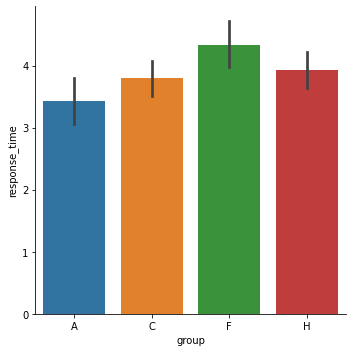

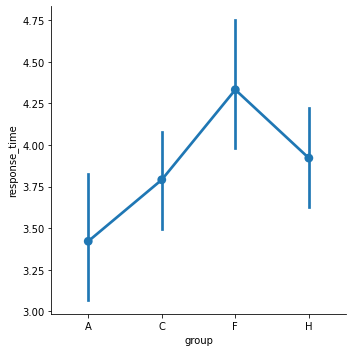

In [43]:
sns.catplot(x='group',
            y='response_time', 
            data = clean_df,
           kind='bar')
sns.catplot(x='group',
            y='response_time', 
            data = clean_df,
           kind='point')

#### Result report for Step 8 (1)

A one-way independent ANOVA on response_time, with group (A, C, F, or H) being independent variable, was conducted. 
 
As a result, group had a significant main effect on response_time, _F_(3,163) = 3.62, _p_ = .01, $η^2$ = .07. 

The post-hoc Tukey’s HSD tests showed that response_time scored significantly higher in group F ($\bar{x_F}$ = 4.33, $sd_F$ = 1.35) than group A ($\bar{x_A}$ = 3.42, $sd_A$ = 0.89, $p = .016$), while there is no other significantly different in the comparision between other pairs between groups ($p > .05$).

From the figures, there is a tendency that for bigger group level (longer delay), the response time is higher, except that the response time gets shorter after delay gets longer than 4300 mins (group F). 

----------------------------------------------------------------

### Step 8 (2) Two-way ANOVA

Lastly, I want to know if **group** (divided by the study-test delay) affect the memory performance(**percent_correct**). 

Even though I tested a significant regression on percent_correct based on test_delay_minutes. The test_delay_minutes in each group are around a similar time logs, and they are mostly super gathered together, where participants were assigned to a random group but the real test_delay_minutes are **sightly vary between the setup time** cause the time that participants showed up varied, which could be seen from the figure below:

<AxesSubplot:xlabel='test_delay_minutes', ylabel='percent_correct'>

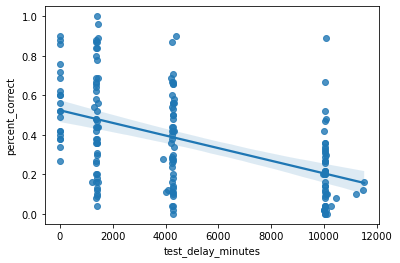

In [44]:
sns.regplot(x=clean_df['test_delay_minutes'], y=clean_df['percent_correct'])

As we can tell from the figure above, the test_delay_minutes are not normally distributed, so treating it as a continuous data and perform parametric statstics feels not right to me.

Therefore, I feel it might make more sense to treat the delay as a categorical variable, which is the **group**, and see if it affects the memory performance(**percent_correct**).

The **group** is a **categorical between-participant** variable that has 4 levels: A, C, F, and H, where the delay in group A < C < F < H.

    group A: lower than 10 mins

    group C: around 1400 mins

    group F: around 4250 mins

    group H: around 10000 mins

Additionally, I want to also test if there is a interaction between **group** and **in_mri**, where in_mri is also a **categorical between-participant** variable that has 2 level, indicating whether a person was in the MRI scanner (in_mri=1) or not in the scanner (in_mri=0).

Therefore, let's perform a 2 (in_mri: 0 or 1) * 4 (group: A, C, F, or H) two-way independent ANOVA on percent_correct.

In [45]:
percorr_bygroupmri=clean_df.groupby(['group','in_mri'])['percent_correct']
percorr_bygroupmri.describe()

count      mean       std   min     25%    50%     75%   max
group in_mri                                                              
A     0        10.0  0.539000  0.149179  0.27  0.4375  0.580  0.6150  0.76
      1        10.0  0.594000  0.223915  0.34  0.4050  0.520  0.8250  0.90
C     0        24.0  0.520417  0.279557  0.04  0.3475  0.515  0.6900  1.00
      1        24.0  0.424167  0.261964  0.08  0.1900  0.400  0.5700  0.88
F     0        25.0  0.379600  0.246145  0.00  0.1300  0.400  0.5600  0.87
      1        25.0  0.364800  0.219186  0.02  0.1800  0.340  0.5000  0.90
H     0        24.0  0.248333  0.216587  0.00  0.0775  0.220  0.3375  0.89
      1        25.0  0.172000  0.136260  0.00  0.0800  0.140  0.2200  0.52

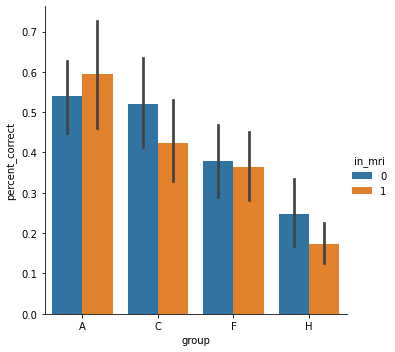

In [46]:
sns.catplot(x='group',
            hue='in_mri',
            y='percent_correct', 
            data = clean_df,
           kind='bar')

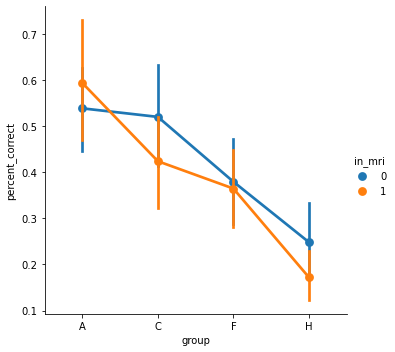

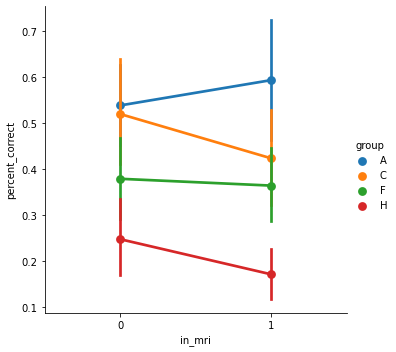

In [47]:
sns.catplot(x='group',
            hue='in_mri',
            y='percent_correct', 
            data = clean_df,
           kind='point')
sns.catplot(hue='group',
            x='in_mri',
            y='percent_correct', 
            data = clean_df,
           kind='point')

From the figures, it seems that the percent_correct is affected by group, and its' hard to say if percent_correct is affected by in_mri.

The pattern of percent_correct between in_mri=1 and in_mri=0 in group A seems different than that in other groups, so there might be a interaction based on the figures

Let's actually run a Anova to test these.

In [48]:
twoway_model = smf.ols(formula = 'percent_correct ~ C(group) + C(in_mri) + C(group):C(in_mri)', 
                       data=clean_df)

twoway_model_fit = twoway_model.fit()

twoway_anova_table = sm.stats.anova_lm(twoway_model_fit, typ=1)

twoway_anova_table 

,df,sum_sq,mean_sq,F,PR(>F)
C(group),3.0,2.531773,0.843924,16.446003,2.340494e-09
C(in_mri),1.0,0.095791,0.095791,1.866726,1.737797e-01
C(group):C(in_mri),3.0,0.104589,0.034863,0.679396,5.658782e-01
Residual,159.0,8.159062,0.051315,NaN,NaN


In [49]:
par_eta2=twoway_anova_table['sum_sq'][0:-1]/twoway_anova_table['sum_sq'][-1]
par_eta2

C(group)              0.310302
C(in_mri)             0.011740
C(group):C(in_mri)    0.012819
Name: sum_sq, dtype: float64

Since there is no significant interaction, and only a significant main effect for group which has 4 levels, we perform a **follow-up Post Hoc comparison on different levels of group**

In [50]:
percorr_bygroup=clean_df.groupby(['group'])['percent_correct']
percorr_bygroup.describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,20.0,0.566500,0.187316,0.27,0.415,0.54,0.6975,0.90
C,48.0,0.472292,0.272383,0.04,0.245,0.44,0.6750,1.00
F,50.0,0.372200,0.230786,0.00,0.165,0.37,0.5550,0.90
H,49.0,0.209388,0.182339,0.00,0.080,0.20,0.3000,0.89


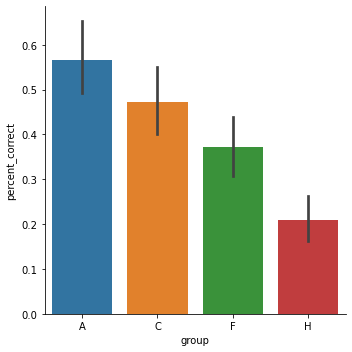

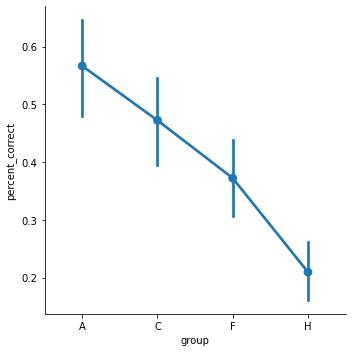

In [51]:
sns.catplot(x='group', 
            y='percent_correct', 
            data=clean_df,
           kind='bar')
sns.catplot(x='group',
            y='percent_correct', 
            data = clean_df,
           kind='point')

In [52]:
# Post Hoc tests
tukey_comparisons = pairwise_tukeyhsd(endog = clean_df['percent_correct'],
                          groups = clean_df['group'],
                          alpha = .05)

tukey_comparisons.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,C,-0.0942,0.4039,-0.2507,0.0623,False
A,F,-0.1943,0.0078,-0.3498,-0.0388,True
A,H,-0.3571,0.001,-0.5131,-0.2011,True
C,F,-0.1001,0.131,-0.2189,0.0187,False
C,H,-0.2629,0.001,-0.3823,-0.1435,True
F,H,-0.1628,0.0026,-0.281,-0.0446,True


A 2 (in_mri: 0 or 1) * 4 (group: A, C, F, or H) two-way independent ANOVA on percent_correct was conducted. 
 
As a result, group had a significant main effect on percent_correct, _F_(3,159) = 16.45, _p_ < .001, partial $η^2$ = .31. 

The post-hoc Tukey’s HSD tests showed that percent_correct scored significantly higher in group A ($\bar{x_A}$ = 0.57, $sd_A$ = 0.19) than group F ($\bar{x_F}$ = 0.37, $sd_F$ = 0.23, $p = .008$) and H ($\bar{x_H}$ = 0.21, $sd_H$ = 0.18, $p = .001$), which is also scored significantly higher in group C ($\bar{x_C}$ = 0.47, $sd_C$ = 0.27) than in group H ($p = .001$), and scored statistically higher in F than H ($p = .003$). While the percent_correct was not significantly different in the comparision between group A and C ($p = .40$), nor C and F ($p = 0.13$).
 
 However, in_mri didn't reach a significant main effect on percent_correct, _F_(1,159) = 1.87, _p_ = .17, partial $η^2$ = .01. 
 
 The interaction between group and in_mri was not significant, _F_(3,159) = 0.68, _p_ = .57, partial $η^2$ = .01.
 

============================================================================================================

## Step 9: Analysis Summary

The whole analysis in this project is about testing which factors influence or predict the long term language related memory retrieval (**percent_correct**).

After the exploratary statsitical analysis from Pearson's correlation, two-sample t-tests, one-way and two-way regression, one-way and two-way independent ANOVA, we now reached more facts about the question we are asking:

- Based on correlation test, there is no trade-off between the response_time and percent_correct, so we could simply deal with percent_correct accuracy data as the dependent variable within the statsitical analysis.

Therefore, let's check a little bit on the response_time first and then get back to percent_correct:
   

**For response_time:**

- One-way Anova reported a significant main effect of group on response_time. Therefore, group affect the response_time, and response_time tend to be longer for a larger group (longer delay). Additionally, post hoc tests showed that response_time only scored higher in group F than group A

**For percent_correct:**


- (1) t-test result indicates that performing the experiment in MRI scanner (in_mri) doesn't affect participants performance (percent_correct). MRI is recording the similar brain activities during the experiment compared to the env without MRI.


- (2) judgement_of learning correlates with percent_correct, and it gets higher when percent_correct increases. Therefore, subjects has metacognition about how well they learned, but they tend to overestimate their learning outcome. However, subjects tend to overestimate their learning outcome.


- (3) Multiple regression amd model comparison results together show that test_delay_minutes and judgment_of_learning are both significant predictors of percent_correct, each of them adding the variances in precent_correct that could be explained by the model, and adding the model fitting.


- (4) A 2 (in_mri: 0 or 1) * 4 (group: A, C, F, or H) two-way independent ANOVA on percent_correct was performed. 
    - The results indicate that group affect the percent_correct, where the post hoc tests showed that percent_correct scored significantly higher in group A than group F and H,higher in group C than in group H, and higher in F than H. While no difference in the comparision between group A and C, nor C and F.
    - in_mri doesnt affect the percent_correct, and doesnt interact with group to leave a effect on percent_correct

**In summary, it's great that there's no response time-accuarcy trade-off. For response_time, group affect the response_time, and response_time tend to be longer for a larger group (longer delay). For percent_correct, in_mri doesn't affect it, but the higher judgement of learning and shorter test_delay_minutes could successfully predict a higher percent_correct, and it's significantly affected by group.**